In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, add, Flatten, Dense, DepthwiseConv2D


def PEPXModel(input_tensor, filters, name):
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'FP')(input_tensor)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Expansion')(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same', name=name + 'DWConv3_3')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'SP')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Extension')(x)
    return x


def keras_model_build(input_size=(240,240, 3)):
    # input
    input = Input(shape=input_size, name='input')
    x = Conv2D(input_shape=input_size, filters=48, kernel_size=(7, 7), activation='relu', padding='same',
               strides=(1, 1))(input)
    x = MaxPool2D(pool_size=(2, 2))(x)
    # _Conv1x1
    x =Conv2D(filters=160, kernel_size=(1,1), activation= 'relu' ,name = "conv1x1160") (x) 
    # pepx1 
    pepx_11 = PEPXModel(x, 160, "pepx1.1")
    pexp_12 = PEPXModel(add([x,pepx_11]),160, "pepx1.2")
    pexp_13 = PEPXModel(add([x,pepx_11,pexp_12]),160, "pepx1.3")
    #conv1x1
    x = Conv2D(328,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x1328") (add([x,pepx_11,pexp_12,pexp_13]))
    #pepx2
    pepx_21 = PEPXModel(x, 328, "pepx21")
    pepx_22 = PEPXModel(add([x,pepx_21]), 328, "pepx22")
    pepx_23 = PEPXModel(add([x,pepx_21,pepx_22]), 328, "pepx23")
    pepx_24 = PEPXModel(add([x,pepx_21,pepx_22,pepx_23]), 328, "pepx24")
    #conv1x1 
    x = Conv2D(640,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x140") (add([x,pepx_21,pepx_22,pepx_23,pepx_24]))
    #pepx3
    pepx_31 = PEPXModel(x,640,'pepx31')
    pepx_32 = PEPXModel(add([x,pepx_31]),640,'pepx32')
    pepx_33 = PEPXModel(add([x,pepx_31,pepx_32]),640,'pepx33')
    pepx_34 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33]),640,'pepx34')
    pepx_35 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34]),640,'pepx35')
    pepx_36 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34,pepx_35]),640,'pepx36')
    #conv1x1 
    x = Conv2D(2048,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x12048") (add([x,pepx_31,pepx_32,pepx_33,pepx_34, pepx_35,pepx_36]))
    #pepx4
    pepx_41 = PEPXModel(x,2048,'pepx41')
    pepx_42 = PEPXModel(add([x,pepx_41]),2048,'pepx42')
    pepx_43 = PEPXModel(add([x,pepx_41,pepx_42]),2048,'pepx43')
    # FC
    fla = Flatten()(add([x,pepx_41,pepx_42,pepx_43]))
    d1 = Dense(256, activation='relu')(fla)
    d1 = Dense(128, activation='relu')(d1)
    output = Dense(3, activation='softmax')(d1)
    return keras.models.Model(input, output)

model = keras_model_build()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 240, 48  7104        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 120, 120, 48  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
import numpy as np
import tensorflow as tf


src = "drive/MyDrive/"
x = np.load(src+"Fold-4/data-train-x-4.npy")
y = np.load(src+"Fold-4/data-train-y-4.npy")
model = keras_model_build()
# model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, batch_size=32, epochs=10)
model.save("drive/MyDrive/modelcnn/modelfold4.h5")



Epoch 1/10
109/109 [==============================] - 7221s 66s/step - loss: 0.6405 - accuracy: 0.7368
Epoch 2/10
109/109 [==============================] - 7177s 66s/step - loss: 0.3339 - accuracy: 0.8783
Epoch 3/10
109/109 [==============================] - 7147s 66s/step - loss: 0.3319 - accuracy: 0.8774
Epoch 4/10
109/109 [==============================] - 7132s 65s/step - loss: 0.2619 - accuracy: 0.9059
Epoch 5/10
109/109 [==============================] - 7138s 65s/step - loss: 0.2276 - accuracy: 0.9192
Epoch 6/10
109/109 [==============================] - 7702s 71s/step - loss: 0.2007 - accuracy: 0.9264
Epoch 7/10
109/109 [==============================] - 7842s 72s/step - loss: 0.1935 - accuracy: 0.9310
Epoch 8/10
109/109 [==============================] - 7889s 72s/step - loss: 0.1327 - accuracy: 0.9476
Epoch 9/10
109/109 [==============================] - 7884s 72s/step - loss: 0.1261 - accuracy: 0.9554
Epoch 10/10
109/109 [==============================] - 7904s 73s/step - l

In [2]:
import numpy as np
import tensorflow as tf

src = "drive/MyDrive/"
xt = np.load(src+"Fold-4/data-test-x-4.npy")
yt = np.load(src+"Fold-4/data-test-y-4.npy")


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import itertools 
def plot_confusion_matrix(cm, target_names, title, cmap=None, normalize=True):
  accuracy = np.trace(cm) / np.sum(cm).astype('float')
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

In [3]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential, Model, load_model
import time 
mod_path2 = "drive/MyDrive/modelcnn/"

LABEL_NAMES = ["COVID","Normal","Pneumonia"]

target_test = np.argmax(yt,axis=1)

mod = load_model(mod_path2+"modelfold4.h5")
awal = time.time()
model = mod.predict(xt)
y_pred = np.argmax(model, axis=1)

print("Hasil K-Fold-4")

cls_report = classification_report(target_test, y_pred, target_names=LABEL_NAMES)

print (cls_report)

acc_score = accuracy_score(target_test, y_pred)
print (acc_score)

cm = confusion_matrix(target_test, y_pred)



print("F1-skor Keseluruhan")

precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1_score = 2 * precision * recall / (precision + recall)

print("Precision = ", precision)
print("Recall = ", recall)
print("F1 Score = ", f1_score)
ahir = time.time()
waktu_testing = awal-ahir
print("waktu testing =",waktu_testing,"detik")

Hasil K-Fold-4
              precision    recall  f1-score   support

       COVID       0.90      0.96      0.93       300
      Normal       0.88      0.90      0.89       300
   Pneumonia       0.96      0.86      0.91       269

    accuracy                           0.91       869
   macro avg       0.91      0.91      0.91       869
weighted avg       0.91      0.91      0.91       869

0.906789413118527
F1-skor Keseluruhan
Precision =  0.9106413280399895
Recall =  0.9051342420487402
F1 Score =  0.9078794337930829
waktu testing = -430.3401439189911 detik


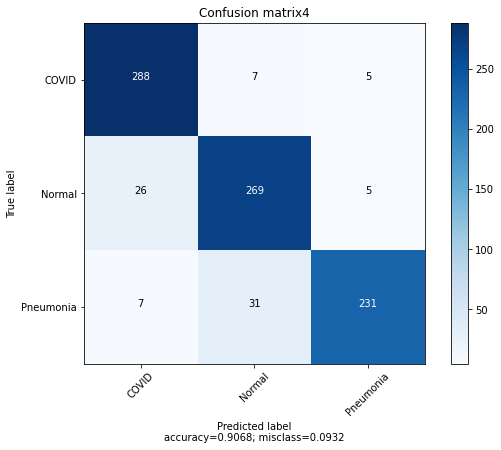

In [ ]:
plot_confusion_matrix(cm,target_names=["COVID","Normal","Pneumonia"],title="Confusion matrix4", normalize=False)

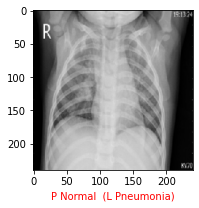

In [ ]:
import matplotlib.pyplot as plt
jumlah = 0
plt.figure(figsize=(20, 20))
plt.subplot(5, 6, 15)
for image, prediction, label in zip(xt, y_pred, target_test ):
  if prediction != label:
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel("P {}  (L {})".format(LABEL_NAMES[prediction],
                                LABEL_NAMES[label]),
                                color='red')

nilai fpr = {0: array([0.        , 0.        , 0.        , 0.        , 0.00175747,
       0.00175747, 0.00175747, 0.00351494, 0.00351494, 0.00527241,
       0.00527241, 0.00702988, 0.00702988, 0.00878735, 0.00878735,
       0.01230228, 0.01230228, 0.01581722, 0.01581722, 0.01757469,
       0.01757469, 0.02108963, 0.02108963, 0.0228471 , 0.0228471 ,
       0.02460457, 0.02460457, 0.02636204, 0.02636204, 0.02811951,
       0.02811951, 0.02987698, 0.02987698, 0.03163445, 0.03163445,
       0.03514938, 0.03514938, 0.03690685, 0.03690685, 0.0456942 ,
       0.0456942 , 0.04745167, 0.04745167, 0.04920914, 0.04920914,
       0.05799649, 0.05799649, 0.05975395, 0.05975395, 0.06502636,
       0.06502636, 0.0685413 , 0.0685413 , 0.07029877, 0.07029877,
       0.07908612, 0.07908612, 0.10896309, 0.10896309, 0.11599297,
       0.11599297, 0.13532513, 0.13532513, 0.14235501, 0.14235501,
       0.25483304, 0.25483304, 0.56766257, 0.5711775 , 1.        ]), 1: array([0.        , 0.        , 0.        

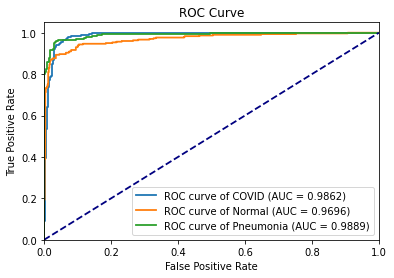

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

def show_roc_curve(y_test_cat, y_pred_prob, target, title):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:,i], y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  linewidth = 1.8
  plt.figure()
  plt.title(title)
  for i in range(3):
      plt.plot(fpr[i], tpr[i], lw=linewidth, label='ROC curve of %s (AUC = %0.4f)' % (target[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
  print("nilai fpr =",fpr)
  print("nilai tpr =" ,tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

show_roc_curve(yt, model, LABEL_NAMES, 'ROC Curve')

0.981647953217923

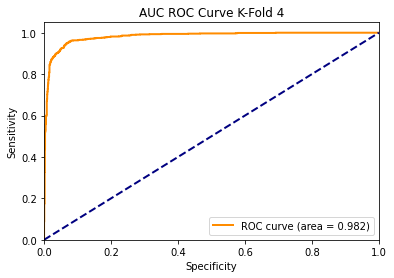

In [ ]:
def create_auc_roc(y_test_cat, y_pred_cat, title):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], model[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), model.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
            lw=lw, label='ROC curve (area = %0.3f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Specificity')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.legend(loc="lower right")
    
    return roc_auc["micro"]
create_auc_roc(yt, model, "AUC ROC Curve K-Fold 4" )

<h1> menghitung waktu testing pergambar</h1>


In [ ]:
import numpy as np
import tensorflow as tf

src = "drive/MyDrive/"
xt = np.load(src+"Fold-4/data-test-x-4.npy")
yt = np.load(src+"Fold-4/data-test-y-4.npy")

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential, Model, load_model
import time
LABEL_NAMES = ["COVID","Normal","Pneumonia"]
mod = load_model("drive/MyDrive/modelcnn/modelfold4.h5")
awal = time.time()
img = xt[0]
x = np.expand_dims(img, axis = 0)
images = np.vstack([x])
classes = mod.predict(images)
y_pred = np.argmax(classes[0])
hasil = LABEL_NAMES[y_pred]
akhir = time.time()
test_time = akhir - awal

In [ ]:
print(hasil)
print("waktu testing per gambar=" ,test_time)

COVID
waktu testing per gambar= 2.0345966815948486
